In [1]:
try:
    import keras 
    print("pydub is installed")
except ImportError:
    print("pydub is not installed")

pydub is installed


In [2]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import wave
import seaborn
import matplotlib.pyplot as plt

In [3]:
os.chdir('C://Users/morni/Side Projects/wav_files')

In [7]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Initialize lists to store mel spectrograms and labels
mel_spectrograms = []
labels = []

base_dir = 'C://Users/morni/Side Projects/wav_files'

# Function to extract mel spectrogram from audio file
def extract_features(file, max_len=128):
    y, sr = librosa.load(file, sr=None)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
    
    # Ensure all spectrograms have the same length
    if mel_spect_db.shape[1] > max_len:
        mel_spect_db = mel_spect_db[:, :max_len]
    else:
        pad_width = max_len - mel_spect_db.shape[1]
        mel_spect_db = np.pad(mel_spect_db, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    return mel_spect_db

# Loop through each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(folder_path, file_name)
                
                # Extract mel spectrogram features
                mel_spect = extract_features(file_path)
                mel_spectrograms.append(mel_spect)
                
                # Add the label (first letter of folder name as label)
                labels.append(folder_name[0].upper())

# Convert to numpy arrays
X = np.array(mel_spectrograms)
y = np.array(labels)

# Encode the labels
unique_labels = np.unique(y)
label_map = {label: i for i, label in enumerate(unique_labels)}
y_encoded = np.array([label_map[label] for label in y])
y_encoded = to_categorical(y_encoded, num_classes=len(unique_labels))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Add a channel dimension for CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Build CNN model
model = models.Sequential()

# First Conv Layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Conv Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Conv Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))  # Prevent overfitting
model.add(layers.Dense(len(unique_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/30


C:\anacondafolder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.3220 - loss: 15.5628 - val_accuracy: 0.2500 - val_loss: 21.3004
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.1914 - loss: 23.9295 - val_accuracy: 0.0833 - val_loss: 5.3830
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.3116 - loss: 4.7795 - val_accuracy: 0.3333 - val_loss: 2.9327
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1706 - loss: 3.6297 - val_accuracy: 0.0833 - val_loss: 2.0013
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.2299 - loss: 1.9903 - val_accuracy: 0.3333 - val_loss: 1.4554
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2611 - loss: 1.5259 - val_accuracy: 0.3333 - val_loss: 1.4102
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3280 - loss: 1.7773 - val_accuracy: 0.3333 - val_loss: 1.3573
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2106 - loss: 1.5931 - val_accuracy: 0.1667 - val_loss: 1.3995


In [8]:
base_dir = 'C://Users/morni/Side Projects/wav_files'

# Initialize lists to store file paths and labels
audio_files = []
labels = []

# Loop through each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):  # You can specify the file type
                file_path = os.path.join(folder_path, file_name)
                audio_files.append(file_path)
                
                # Add the label (using the folder name or any other logic)
                labels.append(folder_name[0].upper())  # Taking the first letter of the folder name as the label

# Now you have two lists: audio_files and labels
print("Audio Files:", audio_files)
print("Labels:", labels)

Audio Files: ['C://Users/morni/Side Projects/wav_files\\dookie\\Basket Case.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Burnout.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Chump.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Coming Clean.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Emenius Sleepus.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Having A Blast.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\In The End.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Longview.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Pulling Teeth.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Sassafras Roots.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\She.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Welcome To Paradise.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\When I Come Around.wav', 'C://Users/morni/Side Projects/wav_files\\insomniac\\86.wav', 'C://Users/morni/Side Projects/wa

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

base_dir = 'C://Users/morni/Side Projects/wav_files'

# Initialize lists to store file paths and labels
audio_files = []
labels = []

# Loop through each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):  # You can specify the file type
                file_path = os.path.join(folder_path, file_name)
                audio_files.append(file_path)
                
                # Add the label (using the folder name or any other logic)
                labels.append(folder_name[0].upper())  # Taking the first letter of the folder name as the label

# Now you have two lists: audio_files and labels
print("Audio Files:", audio_files)
print("Labels:", labels)
               
def extract_features(file, max_len=128):
    y, sr = librosa.load(file, sr=22050)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
    
    # Pad or truncate to max_len
    if mel_spect_db.shape[1] < max_len:
        pad_width = max_len - mel_spect_db.shape[1]
        mel_spect_db = np.pad(mel_spect_db, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mel_spect_db = mel_spect_db[:, :max_len]
    
    return mel_spect_db.flatten()  # Flatten to 1D array', 'The Grouch.wav']


# Extract features and prepare the dataset
X = np.array([extract_features(file) for file in audio_files])
y = np.array(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Audio Files: ['C://Users/morni/Side Projects/wav_files\\dookie\\Basket Case.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Burnout.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Chump.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Coming Clean.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Emenius Sleepus.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Having A Blast.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\In The End.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Longview.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Pulling Teeth.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Sassafras Roots.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\She.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\Welcome To Paradise.wav', 'C://Users/morni/Side Projects/wav_files\\dookie\\When I Come Around.wav', 'C://Users/morni/Side Projects/wav_files\\insomniac\\86.wav', 'C://Users/morni/Side Projects/wa

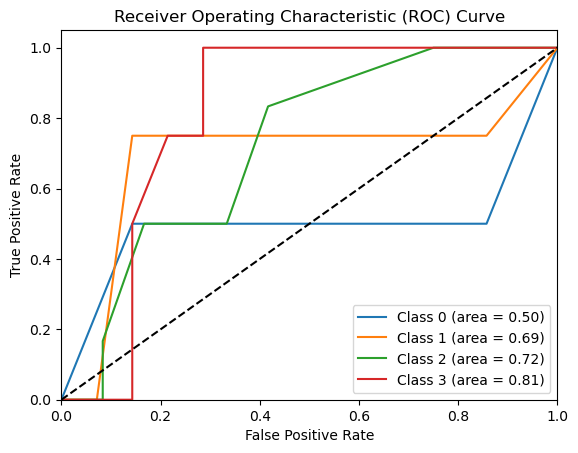

In [10]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Base directory containing the WAV files
base_dir = 'C://Users/morni/Side Projects/wav_files'

# Initialize lists to store file paths and labels
audio_files = []
labels = []

# Loop through each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(folder_path, file_name)
                audio_files.append(file_path)
                
                # Add the label (using the folder name or any other logic)
                labels.append(folder_name[0].upper())  # Taking the first letter of the folder name as the label

# Feature extraction function
def extract_features(file, max_len=128):
    y, sr = librosa.load(file, sr=22050)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
    
    # Pad or truncate to max_len
    if mel_spect_db.shape[1] < max_len:
        pad_width = max_len - mel_spect_db.shape[1]
        mel_spect_db = np.pad(mel_spect_db, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mel_spect_db = mel_spect_db[:, :max_len]
    
    return mel_spect_db.flatten()

# Extract features and prepare the dataset
X = np.array([extract_features(file) for file in audio_files])
y = np.array(labels)

# Binarize the labels for multiclass ROC curve
y_bin = label_binarize(y, classes=np.unique(y))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest classifier with One-vs-Rest strategy
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=15, random_state=42))

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = clf.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure()
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ReAdmis Prediction')
plt.show()

In [ ]:
y, sr = librosa.load(burnout, sr=22050)
librosa.display.waveshow(y, sr=sr)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

In [ ]:
fft = np.fft.fft(y)

mag = np.abs(fft)
freq = np.linspace(0, sr, len(mag))

l_freq = freq[:int(len(freq)/2)]
l_mag = mag[:int(len(mag)/2)]

plt.plot(l_freq, l_mag)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

In [ ]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length)

spectrogram = np.abs(stft)

log_spec = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spec, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('freq')
plt.colorbar()
plt.show()

In [ ]:
MFCCs = librosa.feature.mfcc(y=y, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()